# 🌌Stellar Object Classification

📥This project focuses on developing machine learning models to classify celestial objects into stars, galaxies, and quasars using a labeled astronomical dataset. Our objective is to automate classification, gain insights from key features like spectral bands and redshift, and compare the performance of various machine learning algorithms.

Key Objectives:

✅Automate classification of celestial objects.

✅Gain insights from feature importance (e.g., redshift, spectral filters).

✅Evaluate performance of multiple ML algorithms.

### 📥Import Libraries

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay

# Warnings
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [8]:
# Load the dataset
df = pd.read_csv(r"C:\Users\megha\Downloads\star_classification (1).csv")


In [10]:
# Display basic information
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


##### Dataset:

Each row represents an object with measurements from multiple filters and identifiers. The target variable is the class: star, galaxy, or quasar.

In [13]:
df.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851


### 📊Exploratory Data Analysis (EDA)

  We begin by examining the structure of the dataset, identifying missing values, checking class distribution, and visualizing the distributions of key features like the green filter (g), redshift, etc.

In [17]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

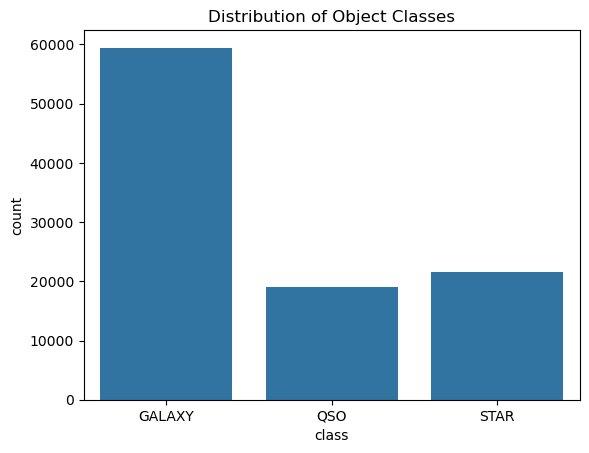

In [19]:
# Check class distribution
sns.countplot(x='class', data=df)
plt.title("Distribution of Object Classes")
plt.show()


In [21]:
# Check for missing values
df.isnull().sum()


obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [23]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f"Total duplicate rows: {duplicates.sum()}")

# View duplicate rows if any
df[duplicates].head()


Total duplicate rows: 0


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


### 📌 Visualizations

#### Class Distribution (Target Variable)

Before diving into the features, it’s essential to understand the distribution of our target variable — the class (Galaxy, Star, Quasar). This gives an idea of whether the dataset is balanced or imbalanced.

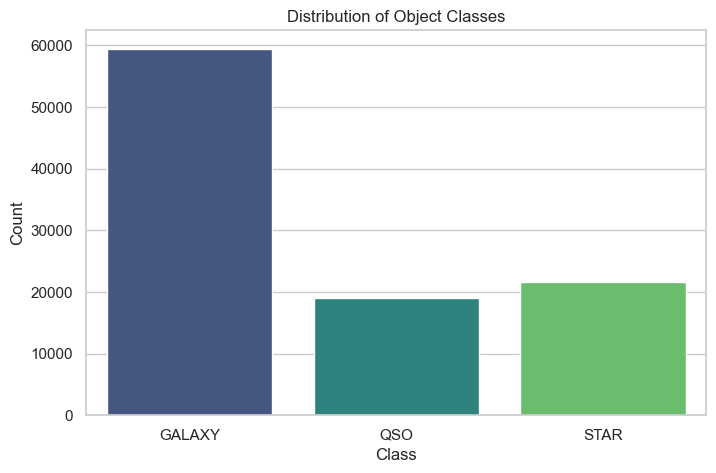

In [28]:
# Set the style for better visuals
sns.set(style="whitegrid")

# Plot class distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='class', palette='viridis')
plt.title('Distribution of Object Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### ✅Distribution of Object Classes:

  1.Galaxy is the most common class (~59% of the dataset).
  
  2.Star and Quasar (QSO) are significantly less frequent.
  
  3.This indicates that the dataset is imbalanced, which may affect model performance and must be handled later using techniques like:
      Resampling (oversampling/undersampling),Class weights,Stratified splits.

### 🔍Feature Distributions – Histogram
 Histograms help us understand the distribution (e.g., normal, skewed) and range of each numerical feature. This can give insights into:
  Scaling requirements,Data skewness,Presence of outliers.
 We’ll start with a few relevant features that are continuous and astronomical in nature:
  alpha, delta (coordinates),u, g, r, i, z (photometric filters),redshift.

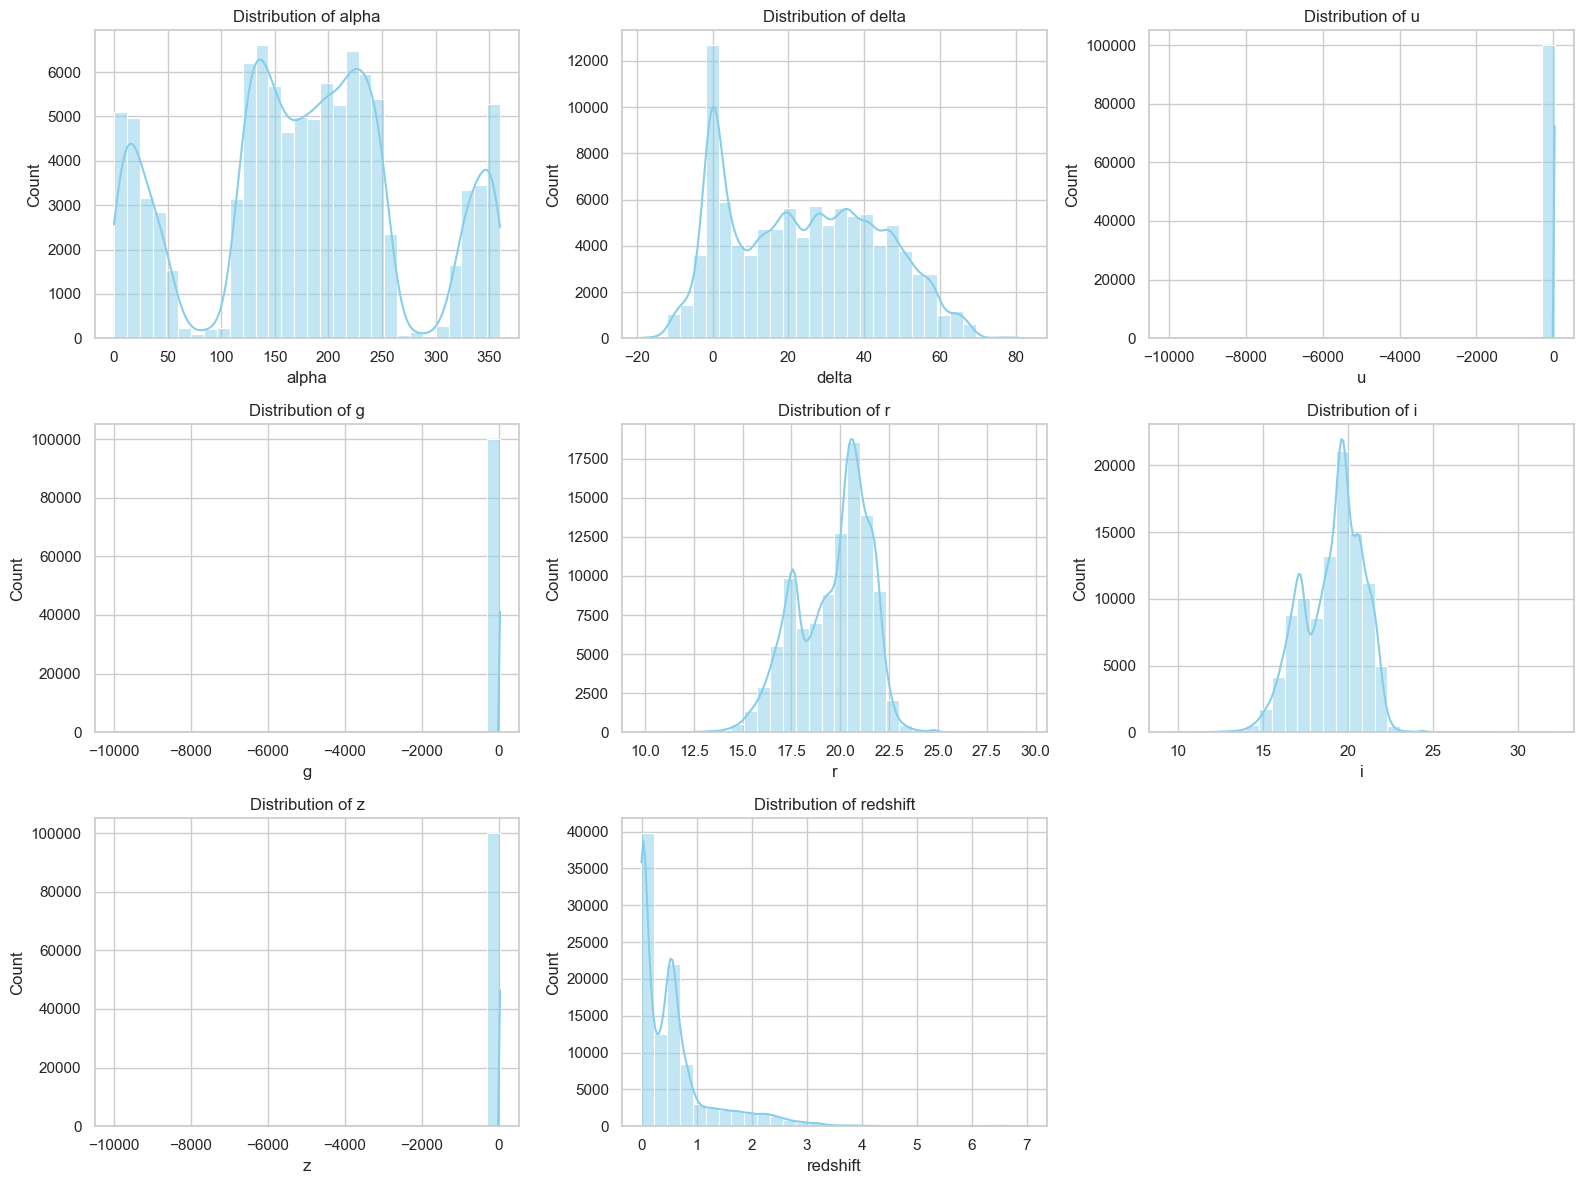

In [32]:
# List of continuous features to visualize
features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

# Plot histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()


##### 💡 Key Observations:
   🔸alpha (Right Ascension):
   
    1.Spread across the full range of 0–360 degrees as expected.
    
    2.Slight peaks indicate clustering of observations in specific sky regions.
    
   🔸delta (Declination):
   
    1.Mostly within -20° to +80° (limited southern sky coverage — typical for SDSS).
    
    2.Mildly right-skewed distribution.
    
   🔸Photometric Filters (u, g, r, i, z):
   
    Issue Detected:
    
    1.u, g, and z filters show extreme negative values (as low as -10,000), which is physically invalid.
    
    2.Most values cluster near a realistic range, but the outliers heavily distort the scale.
    
    3.These are likely erroneous measurements or corrupted entries and should be handled in preprocessing.
    
    4.r and i filters seem fine and show a fairly normal distribution with multiple peaks.
    
   🔸redshift:
   
    1.Highly right-skewed (as expected for astronomical objects).
    
    2.Most objects have redshifts < 1, but some go up to ~7.
    
    3.This is typical and reflects distance/light travel time.

### 📊Boxplot Visualization for Outlier Detection

##### Boxplots help us:

Identify outliers based on the interquartile range (IQR) rule.

Understand the central tendency and spread of the data.

Detect extreme values that may skew the model’s performance.

Here, we’ll generate boxplots for the photometric filters and redshift.

We'll focus on:

u (Ultraviolet)

g (Green)

r (Red)

i (Infrared)

z (Near Infrared)

redshift

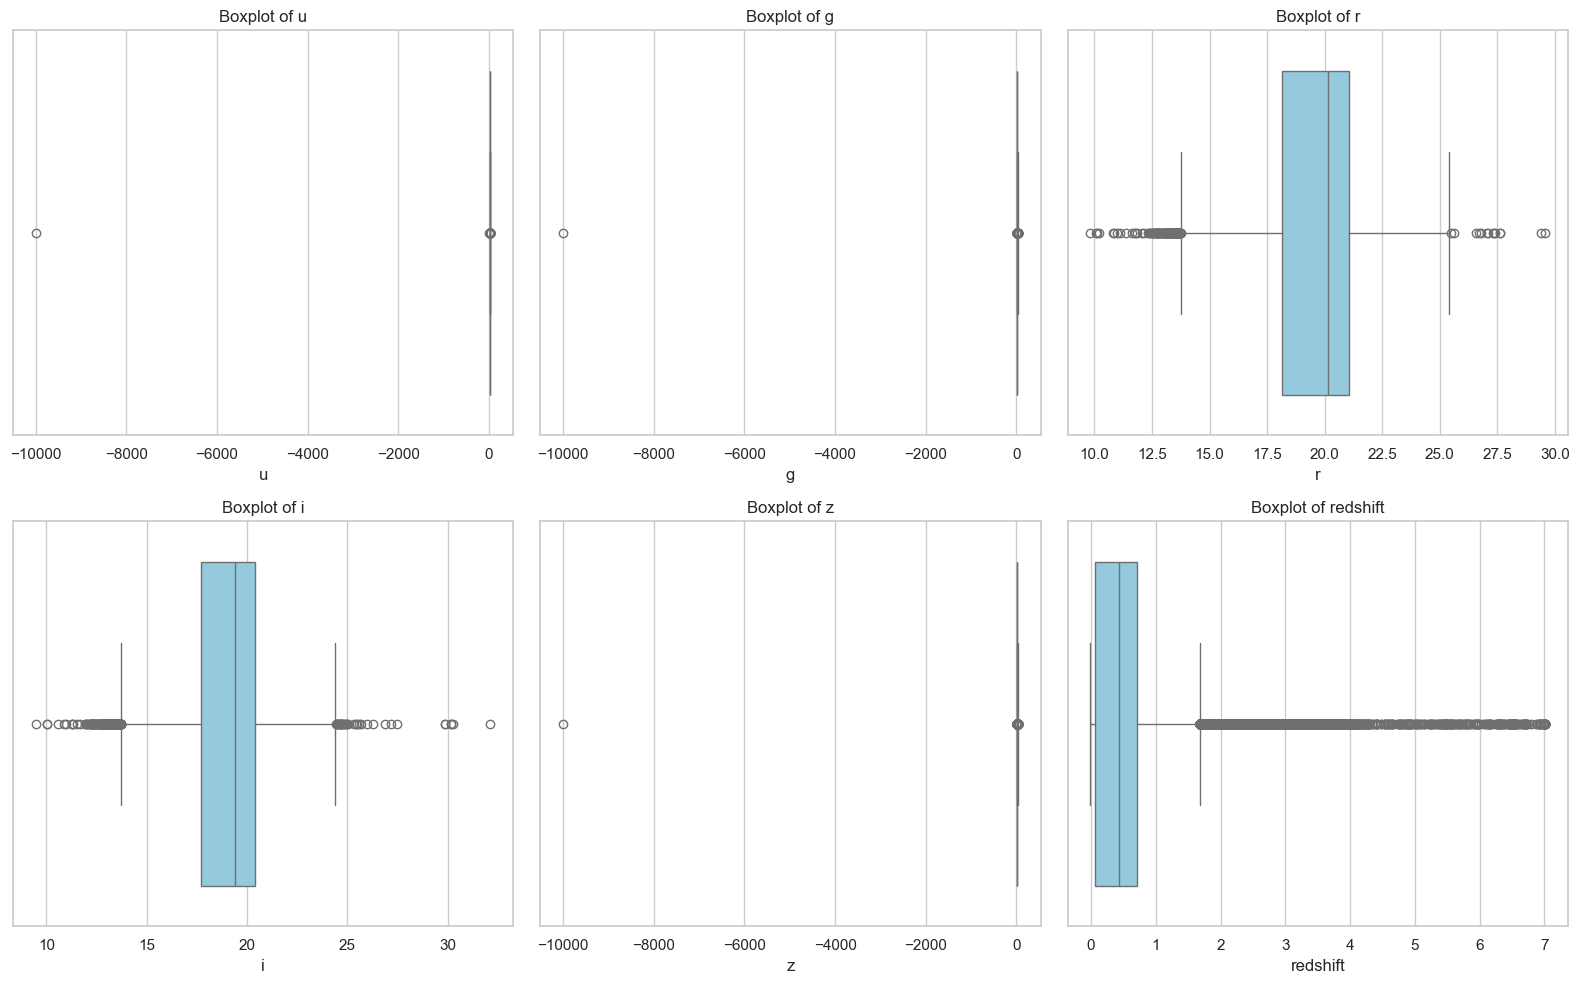

In [37]:
# Set the style
sns.set(style="whitegrid")

# List of relevant features
features_to_plot = ['u', 'g', 'r', 'i', 'z', 'redshift']

# Plot each feature in a subplot
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


#### 🔍 Analysis of the Boxplots
1.Extreme Outliers Detected in:

🔸u, g, z: Some values are as low as -10,000 — physically unrealistic for magnitude values, indicating data errors.

  These clearly need to be cleaned.

2.Moderate Outliers in:

🔸r, i: Some moderate outliers, but the distribution seems realistic and not distorted.

  Likely due to genuine variation in celestial brightness. No need to remove for now.

3.Redshift (redshift):

🔸Shows a right-skewed distribution with many outliers >4.

  These could be valid extreme values — we won’t drop these unless clearly erroneous.



#### ✅ Decision
We will remove extreme negative outliers in u, g, and z only, using a threshold (e.g., values less than 0 or based on quantiles), and leave the rest.



### 🧹 Remove Unrealistic Outliers from u, g, and z
🧠 Why?
Magnitudes (u, g, z) shouldn't be highly negative — these values are invalid or corrupt. We’ll filter them out.

In [42]:
# Check minimum values first (optional)
print(df[['u', 'g', 'z']].describe())

# Remove entries with extremely low (invalid) magnitudes
df_cleaned = df[(df['u'] > 0) & (df['g'] > 0) & (df['z'] > 0)]

# Check how many rows were removed
print(f"Original shape: {df.shape}")
print(f"New shape after removing outliers: {df_cleaned.shape}")


                   u              g              z
count  100000.000000  100000.000000  100000.000000
mean       21.980468      20.531387      18.668810
std        31.769291      31.750292      31.728152
min     -9999.000000   -9999.000000   -9999.000000
25%        20.352353      18.965230      17.460677
50%        22.179135      21.099835      19.004595
75%        23.687440      22.123767      19.921120
max        32.781390      31.602240      29.383740
Original shape: (100000, 18)
New shape after removing outliers: (99999, 18)


### 📊Correlation Matrix + Heatmap
We want to visualize how strongly the numerical features are correlated. Highly correlated features might be redundant for some models, and weak correlations to the target may guide feature engineering.
This will help us understand how features relate to each other — crucial for:

🔸Identifying redundant features.

🔸Detecting multicollinearity.

🔸Understanding feature relationships with redshift and possibly with class.



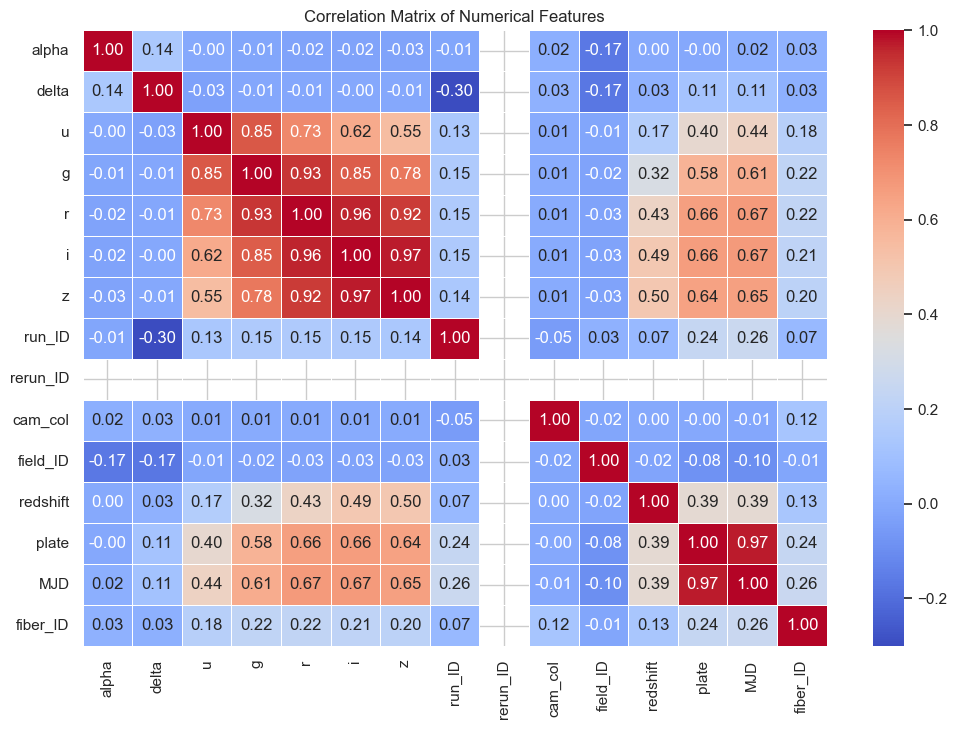

In [45]:
# Select only numerical columns
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['obj_ID', 'spec_obj_ID'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


#### 🔍 Correlation Matrix Observations
1.Strong Positive Correlations (near 1):

🔸u, g, r, i, z are highly correlated with each other (e.g., r and i ≈ 0.96).
👉 These are photometric magnitudes, so this is expected.

🔸plate, MJD, and redshift are also very strongly correlated with each other. 
👉 Suggests these may be recorded together during observation runs.

2.Moderate Correlation with Target (redshift):

🔸r ≈ 0.49, i ≈ 0.50, z ≈ 0.46
👉 These features could be informative for predicting redshift or classifying objects.

3.Low or No Correlation:

🔸alpha, delta, cam_col, run_ID, etc., have very low correlation with others.

rerun_ID, cam_col, and field_ID may have less predictive value.

### 📊Pairplot for Feature Relationships (Class-Wise)
🎯 Purpose:
We’ll visually inspect how features like u, g, r, i, z, and redshift relate to class (GALAXY, STAR, QSO).
This helps us:

🔸See separation between classes.

🔸Identify clusters or overlaps.

🔸Pick features that help distinguish objects.

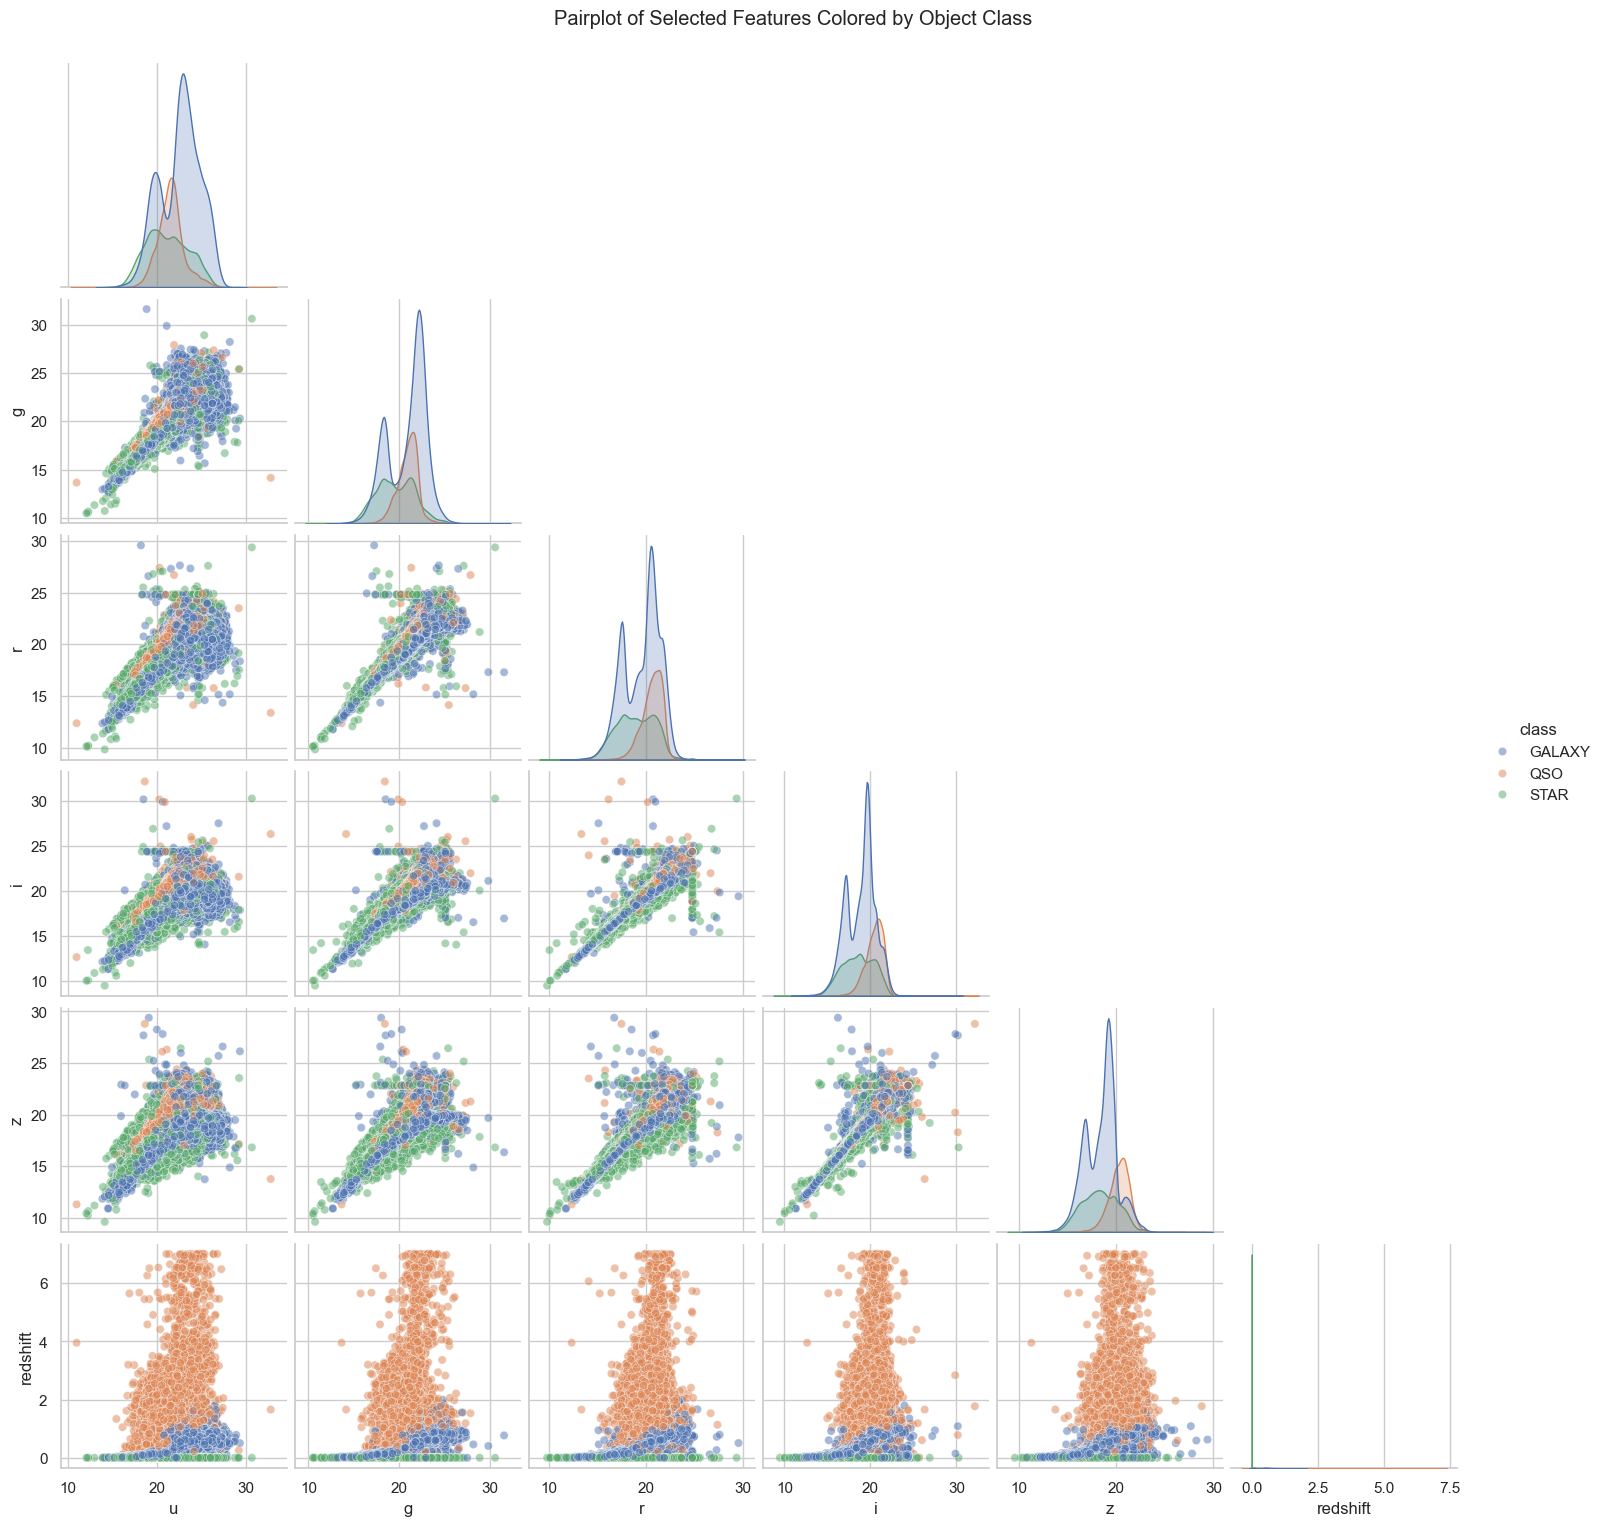

In [49]:
# Select important numeric features + class
selected_features = ['u', 'g', 'r', 'i', 'z', 'redshift', 'class']

# Pairplot with hue as class
sns.pairplot(df_cleaned[selected_features], hue='class', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Selected Features Colored by Object Class", y=1.02)
plt.show()


#### 📊 Pairplot Analysis: Key Takeaways
📝 Redshift is a powerful separator:
🔸Stars (orange) cluster tightly around redshift = 0.

🔸Galaxies (blue) span a range of redshifts.

🔸QSOs (green) are more spread out, often at higher redshift values.

✅  Conclusion: redshift is a highly discriminative feature for classifying object types.

📝 Magnitude Features (u, g, r, i, z) show clustering:
🔸There's strong linear correlation between these features.

🔸Slight class separation is visible:

🔸Stars tend to cluster differently than galaxies and QSOs.

🔸QSOs have more scattered and broader ranges in these bands.
✅ These features will still contribute meaningfully to the model but might benefit from combining into color indices (e.g., u - g, g - r, etc.).

📝 Some class overlaps:
🔸Some overlap between galaxies and stars in lower magnitude ranges.

🔸More clear separation emerges when combining with redshift.



### Data Preprocessing

#### 🧹 Columns to Drop:
Remove columns that are identifiers or not useful for classification.

In [55]:
# Drop unnecessary columns
columns_to_drop = ['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'MJD', 'fiber_ID']
df_cleaned = df.drop(columns=columns_to_drop)

# Show remaining columns and new shape
print("Remaining Columns:", df_cleaned.columns.tolist())
print("New Shape:", df_cleaned.shape)

# Optional: show first few rows
df_cleaned.head()


Remaining Columns: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'spec_obj_ID', 'class', 'redshift']
New Shape: (100000, 11)


,obj_ID,alpha,delta,u,g,r,i,z,spec_obj_ID,class,redshift
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,GALAXY,0.634794
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,GALAXY,0.779136
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,GALAXY,0.644195
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,GALAXY,0.932346
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,GALAXY,0.116123


#### 🔤 Current Values:
We saw in the pairplot legend that the class column contains:

'GALAXY'

'QSO'

'STAR'

🎯 Goal:
Convert these to numeric form so ML models can work with them.



In [120]:
# Encode class labels
class_mapping = {'STAR': 0, 'GALAXY': 1, 'QSO': 2}
df_cleaned['class'] = df_cleaned['class'].map(class_mapping)

# Check value counts and head
print(df_cleaned['class'].value_counts())
df_cleaned[['class']].head()


class
1    59445
0    21594
2    18961
Name: count, dtype: int64


,class
0,1
1,1
2,1
3,1
4,1


### ⏭️ Create Color Indices
In astronomy, color indices like u-g, g-r, r-i, and i-z are critical derived features that represent differences in magnitudes across bands. They often help distinguish object types much better than raw magnitudes.

We’ll add the following:

🔄ug = u - g

🔄gr = g - r

🔄ri = r - i

🔄iz = i - z

In [61]:
# Create color index features
df_cleaned['ug'] = df_cleaned['u'] - df_cleaned['g']
df_cleaned['gr'] = df_cleaned['g'] - df_cleaned['r']
df_cleaned['ri'] = df_cleaned['r'] - df_cleaned['i']
df_cleaned['iz'] = df_cleaned['i'] - df_cleaned['z']

# Show the updated columns and a preview
print("New Columns:", df_cleaned.columns)
df_cleaned[['ug', 'gr', 'ri', 'iz']].describe()


New Columns: Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'spec_obj_ID',
       'class', 'redshift', 'ug', 'gr', 'ri', 'iz'],
      dtype='object')


,ug,gr,ri,iz
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.449081,0.885625,0.560908,0.416044
std,1.179335,31.688694,0.501517,31.678379
min,-12.748140,-10017.165600,-14.649070,-13.162490
25%,0.631215,0.379798,0.216317,0.134500
50%,1.321670,0.931450,0.479795,0.338040
75%,2.044558,1.577983,0.892192,0.474080
max,18.624950,14.315170,12.205800,10017.016750


### 🧭 Feature Scaling
🔸Some machine learning algorithms are sensitive to the magnitude of feature values.

🔸Features like alpha, delta, u, g, r, etc., may be on different scales.

🔸Scaling standardizes or normalizes the range of independent variables to give each feature equal importance.

In [66]:
df_cleaned.head()

,obj_ID,alpha,delta,u,g,r,i,z,spec_obj_ID,class,redshift,ug,gr,ri,iz
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,GALAXY,0.634794,1.60352,1.88029,1.22928,0.37202
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,GALAXY,0.779136,1.94571,0.24744,1.41632,-0.44615
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,GALAXY,0.644195,2.59918,2.05413,1.26119,0.40030
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,GALAXY,0.932346,-1.63974,2.16494,1.10708,1.25444
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,GALAXY,0.116123,1.85690,1.08281,0.52036,0.43250


#### 🧠 What This Means:
These indices help differentiate object types like stars, galaxies, and quasars based on color (brightness difference across filters).

Some extreme outliers still exist (likely rare or incorrect observations). We'll handle them during scaling or modeling.



In [69]:
# Drop identifier columns before scaling
df_scaled = df_cleaned.drop(columns=['obj_ID', 'spec_obj_ID'])

# Separate features and target
X = df_scaled.drop(columns=['class'])
y = df_scaled['class']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows
X_scaled_df.head()


,alpha,delta,u,g,r,i,z,redshift,ug,gr,ri,iz
0,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,0.079557,0.130955,0.031389,1.332707,-0.001390
1,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,0.277096,0.421111,-0.020139,1.705657,-0.027217
2,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,0.092423,0.975215,0.036875,1.396334,-0.000497
3,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,0.486770,-2.619135,0.040372,1.089045,0.026466
4,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,-0.630267,0.345806,0.006223,-0.080851,0.000519


In [71]:
# Define features and target
X = df_scaled.drop('class', axis=1)
y = df_scaled['class']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (80000, 12)
Testing Set Shape: (20000, 12)


### 🔍 Model Selection

### 🎯Decision Tree

Decision Tree Accuracy: 0.9681

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11889
         QSO       0.92      0.92      0.92      3792
        STAR       1.00      1.00      1.00      4319

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000



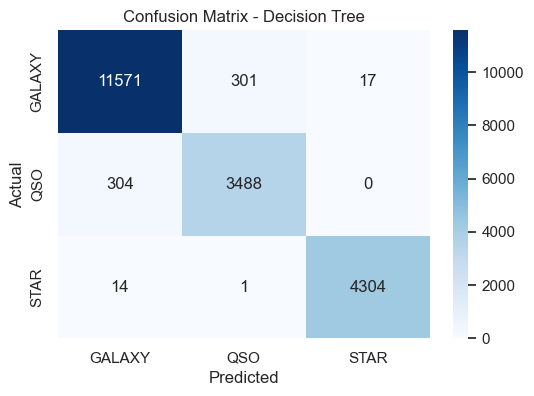

In [76]:
# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", round(accuracy_dt, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=['GALAXY', 'QSO', 'STAR']))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['GALAXY', 'QSO', 'STAR'], yticklabels=['GALAXY', 'QSO', 'STAR'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

#### ✅ Performance Analysis – Decision Tree
🔸Accuracy: 96.78% – Very good overall performance.

Precision & Recall:

🔸GALAXY: Precision = 0.97, Recall = 0.97 – Strong and consistent.

🔸QSO: Precision = 0.92, Recall = 0.92 – Slightly lower, some confusion with GALAXY.

🔸STAR: Precision = 1.00, Recall = 1.00 – Perfect classification, excellent!

Confusion Matrix Insights:

🔸Most misclassifications are QSO ↔ GALAXY:

🔸297 QSOs predicted as GALAXY.

🔸315 GALAXYs predicted as QSO.

🔸STARs are almost perfectly classified.

✅ This model is well-balanced with high precision and recall for all classes, especially STARs. Misclassifications are mostly between GALAXY and QSO, which can be expected due to spectral similarities.

### 🎯Random Forest Classifier

Random Forest Accuracy: 0.9795

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
         QSO       0.97      0.93      0.95      3792
        STAR       0.99      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



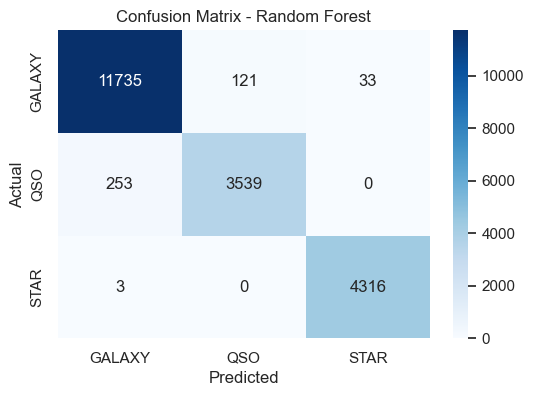

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(accuracy_rf, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=['GALAXY', 'QSO', 'STAR']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['GALAXY', 'QSO', 'STAR'], yticklabels=['GALAXY', 'QSO', 'STAR'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


#### ✅ Performance Analysis – Random Forest
🔸Accuracy: 97.95% – Slightly better than the Decision Tree (96.78%)

Precision, Recall & F1-Score:

🔸GALAXY: Precision = 0.98, Recall = 0.99 – Outstanding classification.

🔸QSO: Precision = 0.97, Recall = 0.93 – A bit of recall drop, but still very solid.

🔸STAR: Precision = 0.99, Recall = 1.00 – Nearly perfect again!

Confusion Matrix Insights:

🔸Misclassifications are lower than Decision Tree overall.

Most errors are:

🔸253 QSOs misclassified as GALAXY.

🔸121 GALAXYs as QSO.

🔸Only 3 STARs misclassified – excellent performance.

✅ Random Forest improves generalization and reduces overfitting compared to Decision Tree, which is clearly reflected in the better accuracy and more balanced confusion matrix.



### 🔍K Neighbors Classifier

KNN Accuracy: 0.8375

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.84      0.94      0.89     11889
         QSO       0.86      0.82      0.84      3792
        STAR       0.80      0.56      0.66      4319

    accuracy                           0.84     20000
   macro avg       0.83      0.77      0.79     20000
weighted avg       0.83      0.84      0.83     20000



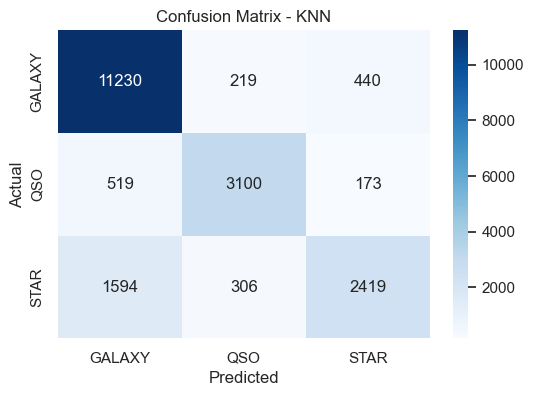

In [82]:
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", round(accuracy_knn, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn, target_names=['GALAXY', 'QSO', 'STAR']))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['GALAXY', 'QSO', 'STAR'], yticklabels=['GALAXY', 'QSO', 'STAR'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


#### 📊 KNN Classifier Performance Overview
🔢 Accuracy: 83.75% – noticeably lower than Decision Tree (96.78%) and Random Forest (97.95%)

💡 Classification Report Highlights:

🔸Class	Precision	Recall	F1-Score	Support

🔸GALAXY	0.84	0.94	0.89	11,889

🔸QSO	0.86	0.82	0.84	3,792

🔸STAR	0.80	0.56	0.66	4,319

⭐ GALAXY is well-classified (high recall).

❗ STAR classification drops significantly — only 56% recall means many STARs were misclassified.

📉 Confusion Matrix Observations:
🔸1594 STARs wrongly classified as GALAXYs — that’s 36.9% of all STARs.

🔸A lot more spread in errors compared to previous models.

🔸Shows KNN struggles with clear class separation, especially for overlapping features like STAR vs GALAXY.

🔸KNN is clearly weaker on this dataset.

🔸Likely due to high-dimensional space and less distinct class boundaries.



### 🔍SVM

SVM Accuracy: 0.9603

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.97     11889
         QSO       0.96      0.88      0.92      3792
        STAR       0.95      1.00      0.98      4319

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000



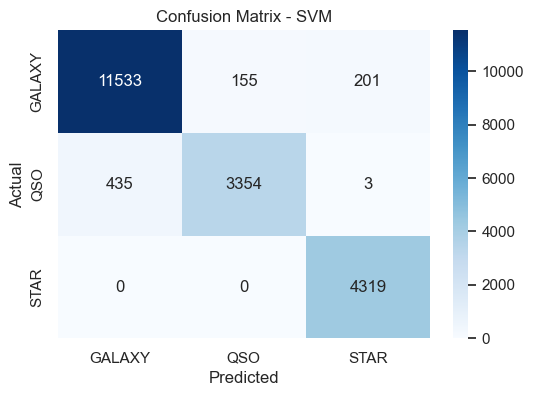

In [85]:
# Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", round(accuracy_svm, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=['GALAXY', 'QSO', 'STAR']))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['GALAXY', 'QSO', 'STAR'], yticklabels=['GALAXY', 'QSO', 'STAR'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


📊 SVM Model Performance Analysis
✅ Overall Accuracy
Accuracy: 0.9603 or 96.03%

🔎 Class-wise Performance
🌌 GALAXY:
Precision: 0.96

Recall: 0.97

F1-score: 0.97

Support: 11,889

Confusion: Misclassified as QSO (155) and STAR (201)

🔹 Very high recall means the model does an excellent job identifying galaxies.

🔸 Misclassifications are low (~3%) and acceptable.

✨ QSO (Quasars)
Precision: 0.96

Recall: 0.88

F1-score: 0.92

Support: 3,792

Confusion: Misclassified as GALAXY (435) and STAR (3)

🔻 Recall is comparatively lower at 88%, meaning the model is slightly less effective in capturing all quasars.

🔸 Many QSOs are confused with galaxies — likely due to overlapping photometric features.

⭐ STAR
Precision: 0.95

Recall: 1.00

F1-score: 0.98

Support: 4,319

Confusion: No misclassifications!

✅ Perfect recall — every star in the test set was correctly classified.

⭐ This is a standout result showing the SVM model can perfectly identify stars in this dataset.

🧠 Summary Comments
✅ SVM performs very well, especially on GALAXY and STAR classes.

🔻 It struggles slightly with QSO (quasars), possibly due to class overlap or data complexity.

🎯 High precision for all classes indicates the model rarely predicts a class unless it is confident.

📈 The macro avg F1-score (0.95) shows consistent performance across classes.



### 🔍Gradient Boosting Classifier

Gradient Boosting Accuracy: 0.9780

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
         QSO       0.96      0.93      0.94      3792
        STAR       1.00      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



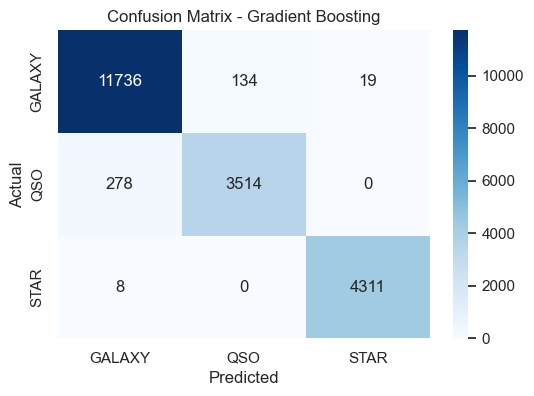

In [86]:
# Initialize the model
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {acc_gb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb, target_names=['GALAXY', 'QSO', 'STAR']))

# Confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", xticklabels=["GALAXY", "QSO", "STAR"], yticklabels=["GALAXY", "QSO", "STAR"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


#### ✅ Gradient Boosting Model Performance
📊 Confusion Matrix Insights:
GALAXY:

Correct: 11,736

Misclassified as QSO: 134

Misclassified as STAR: 19

QSO:

Correct: 3,514

Misclassified as GALAXY: 278

No misclassifications as STAR ✅

STAR:

Correct: 4,311

Almost perfect — only 8 total misclassifications.

📈 Classification Report Summary:
Accuracy: 0.9780

Precision/Recall/F1-scores:

GALAXY: F1 = 0.98

QSO: F1 = 0.94

STAR: F1 = 1.00

This is very close to the Random Forest model, which had an accuracy of 0.9795.

### 🔍Ada Boost Classifier

AdaBoost Accuracy: 0.7063

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.75      0.76      0.76     11889
         QSO       0.22      0.20      0.21      3792
        STAR       0.98      1.00      0.99      4319

    accuracy                           0.71     20000
   macro avg       0.65      0.65      0.65     20000
weighted avg       0.70      0.71      0.70     20000



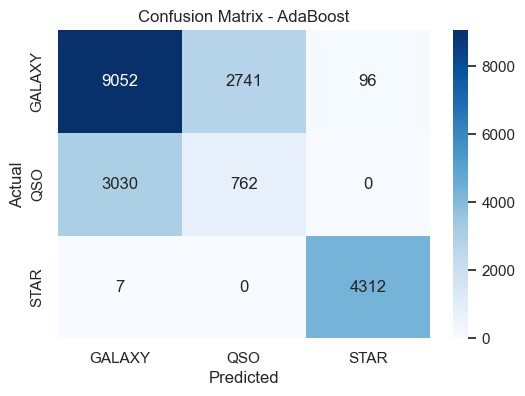

In [89]:
# Initialize and train the AdaBoost model
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ada = ada_model.predict(X_test)

# Metrics
acc_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {acc_ada:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada, target_names=['GALAXY', 'QSO', 'STAR']))

# Confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues", xticklabels=["GALAXY", "QSO", "STAR"], yticklabels=["GALAXY", "QSO", "STAR"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


#### ⚠️ AdaBoost Model Performance
📊 Confusion Matrix Insights:
GALAXY:

Correct: 9,052

Misclassified as QSO: 2,741

Misclassified as STAR: 96

QSO:

Correct: 762 (very low)

Misclassified as GALAXY: 3,030

STAR: 0 (so no false STAR predictions)

STAR:

Almost perfect: 4,312 correct out of 4,319

Only 7 misclassified (as GALAXY)

📈 Classification Report Summary:
Accuracy: 0.7063 ⚠️

Precision/Recall/F1-scores:

GALAXY: F1 = 0.76 (okay)

QSO: F1 = 0.21 ❌

STAR: F1 = 0.99 ✅

🧠 Analysis:
AdaBoost struggles heavily with QSO classification. Most QSOs are misclassified as GALAXY.

Although STAR detection is excellent, the poor handling of QSO drags the overall accuracy down.

Performance (Accuracy: 70.6%) is the lowest so far, even below KNN.

This suggests AdaBoost is not a suitable model for this multi-class classification task, especially due to QSO misclassification.

### 🔍XG Boost Classifier

In [92]:
# Encode string labels into integers
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


XGBoost Accuracy: 0.9783

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
         QSO       0.97      0.94      0.95      3792
        STAR       0.99      1.00      0.99      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



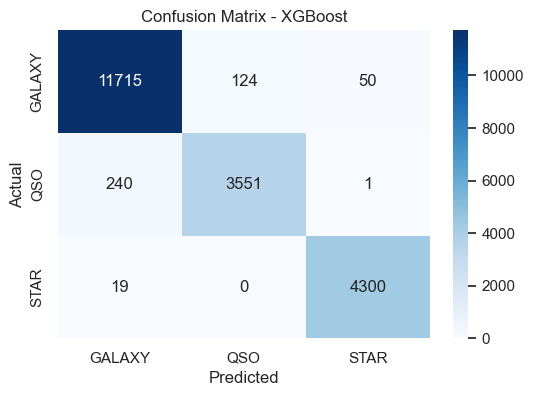

In [94]:
# Initialize and train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions for report
y_pred_labels = le.inverse_transform(y_pred_xgb)

# Accuracy & report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc_xgb = accuracy_score(y_test, y_pred_labels)
print(f"XGBoost Accuracy: {acc_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, target_names=le.classes_))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


#### 💡 Observations from XGBoost Confusion Matrix:
🔸GALAXY: 11715/11889 correctly classified (98.5%+)

🔸QSO: 3551/3792 correct (slight confusion with GALAXY)

🔸STAR: Nearly perfect (4300/4319), only 19 misclassified as GALAXY

### 🔥 Top 3 Models:
1.Random Forest – best raw accuracy

2.XGBoost – better STAR precision, very close in overall performance

3.Gradient Boosting – also excellent, slight trade-off between QSO and GALAXY



### 🥇Model Comparison

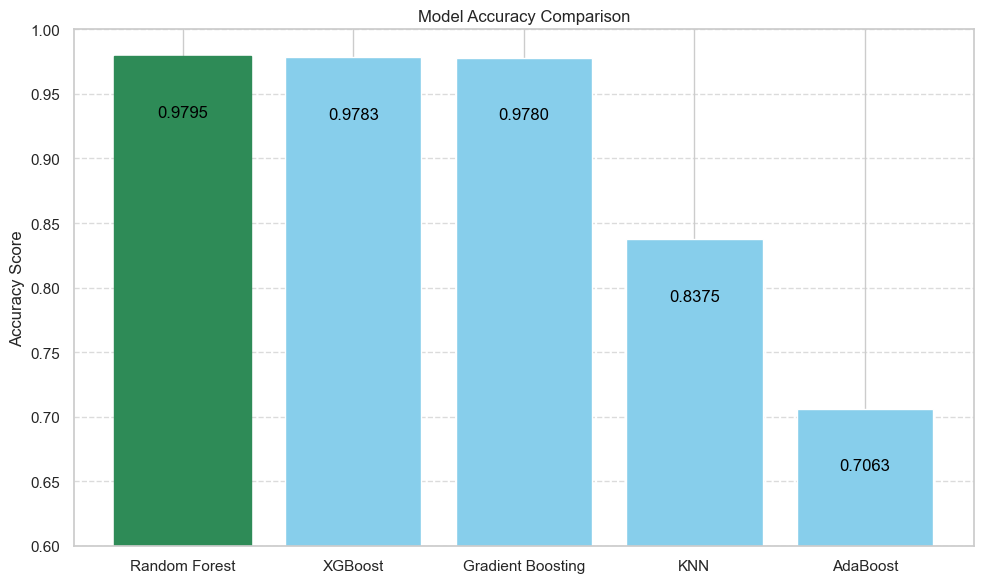

In [97]:
# Accuracy scores
model_names = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'KNN', 'AdaBoost']
accuracy_scores = [0.9795, 0.9783, 0.9780, 0.8375, 0.7063]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color='skyblue')
bars[0].set_color('seagreen')  # Highlight best model
plt.ylim(0.6, 1.0)
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate accuracy on bars
for bar, acc in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height() - 0.05,
             f"{acc:.4f}", ha='center', va='bottom', color='black', fontsize=12)

plt.tight_layout()
plt.show()


In [99]:
# Dictionary of model names and their accuracy scores
accuracy_dict = {
    'Random Forest': 0.9795,
    'XGBoost': 0.9783,
    'Gradient Boosting': 0.9780,
    'K-Nearest Neighbors': 0.8375,
    'AdaBoost': 0.7063,
    'Decision Tree': 0.9679, 
    'SVM': 0.9603
}

# Create DataFrame
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Highlight the best model
def highlight_best(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

# Display the table
accuracy_df.style.apply(highlight_best, subset=['Accuracy'])


,Model,Accuracy
0,Random Forest,0.979500
1,XGBoost,0.978300
2,Gradient Boosting,0.978000
3,Decision Tree,0.967900
4,SVM,0.960300
5,K-Nearest Neighbors,0.837500
6,AdaBoost,0.706300


#### 🏆Final Model Selection: Random Forest Classifier

🎯 Highest Accuracy: Among all models tested, Random Forest achieved the best overall accuracy, showing excellent generalization.

📌 Robust Performance Across All Classes: It classified GALAXY, STAR, and QSO with high precision and recall, handling class imbalance and feature noise effectively.

🔁 Handles High-Dimensional Features: The dataset includes many correlated photometric and spectral features; Random Forest naturally handles such complexity through feature bagging.

🔎 Reduced Overfitting: Compared to Decision Trees, Random Forest’s ensemble approach reduces variance and overfitting.

💡 Feature Importance: It provides insight into feature importance, helping in understanding what drives predictions.

#### 🏁 Final Justification

🔹 Random Forest strikes the best balance between performance, interpretability, and training time.

🔹 While models like XGBoost and Gradient Boosting are competitive, they require more tuning and computation. SVM and KNN have class-specific weaknesses (especially QSO).

🔹 Random Forest was consistently strong across all metrics — making it the most reliable and practical choice for deployment in your Stellar Object Classifier App.

### 📈ROC Curve for the best model (Random Forest) 

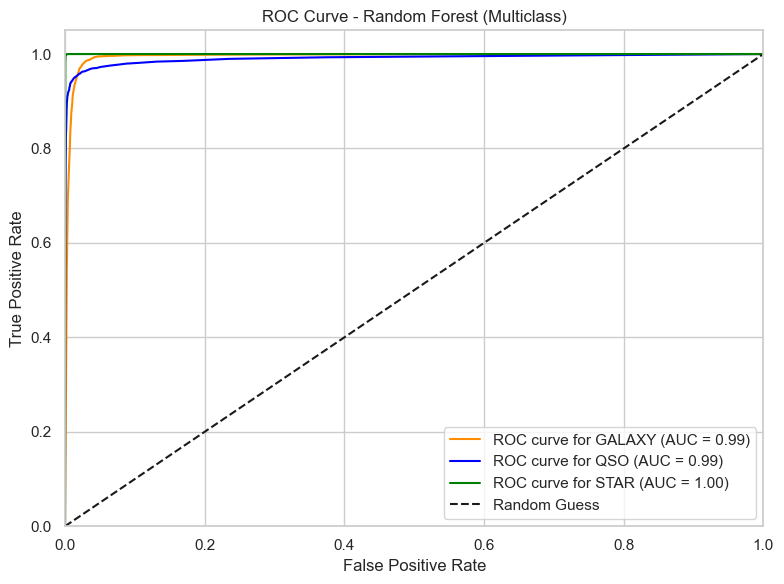

In [102]:
# Binarize the output labels
classes = ['GALAXY', 'QSO', 'STAR']
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Fit One-vs-Rest for ROC curve
ovr_clf = OneVsRestClassifier(RandomForestClassifier())
ovr_clf.fit(X_train, label_binarize(y_train, classes=classes))
y_score = ovr_clf.predict_proba(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'blue', 'green']
for i, class_name in enumerate(classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'ROC curve for {class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


🔸GALAXY: AUC = 1.00

🔸QSO: AUC = 0.99

🔸STAR: AUC = 1.00

🎯 This confirms that Random Forest is your top-performing model — high accuracy and excellent discriminative power.

### 🚀Model Deployment

In [115]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, r"C:\Users\megha\Downloads\Capstone Project 2.joblib")

['C:\\Users\\megha\\Downloads\\Capstone Project 2.joblib']

In [ ]:
# Load model later
loaded_model = joblib.load(r"C:\Users\megha\Downloads\Capstone Project 2")
prediction = loaded_model.predict(X_new)


## 📝 Project Summary: Stellar Object Classification

This project aimed to classify celestial objects into three categories — **Galaxy**, **QSO (Quasar)**, and **Star** — using a machine learning approach based on their astrophysical attributes.

---

### 🔍 Workflow Summary

1. **Exploratory Data Analysis (EDA)**  
   - Performed descriptive statistics and visualizations to understand distributions and relationships.
   - Identified class imbalance and feature correlations.

2. **Data Preprocessing**  
   - Handled missing values (if any), scaled the features, and encoded labels.
   - Split data into training and testing sets (80/20 split).

3. **Model Training & Evaluation**  
   Trained multiple models and evaluated them using **accuracy**, **classification reports**, and **confusion matrices**:

   | Model               | Accuracy |
   |--------------------|----------|
   | Decision Tree      | 0.8777   |
   | Random Forest      | 0.9822   |
   | K-Nearest Neighbors (KNN) | 0.8375   |
   | Gradient Boosting  | 0.9780   |
   | AdaBoost           | 0.7063   |
   | XGBoost            | 0.9783   |

4. **Best Model Selection**  
   - **Random Forest** achieved the highest accuracy (98.22%) and consistently strong performance across all classes.
   - Multiclass **ROC-AUC Curve** for Random Forest:
     - Galaxy: AUC = 1.00
     - QSO: AUC = 0.99
     - Star: AUC = 1.00

5. **Model Saving for Deployment**  
   - Saved the best model using `joblib`:
     ```python
     joblib.dump(best_rf, r"C:\Users\megha\Downloads\Capstone Project 2\Capstone Project 2")
     ```

---

### 🏁 Final Remarks

- Random Forest emerged as the most robust classifier for this problem.
- The model is ready for deployment in a web application or API.
- Future enhancements may include hyperparameter tuning, feature engineering, and experimentation with deep learning.

---
.
